### 1. **Introduction**
---

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/INFO 213/INFO 213 project/
news = pd.read_csv("OnlineNewsPopularity.csv")

news.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1cNcyKlwF_9sOK1GBg-ccDrK0dctN_sNe/INFO 213 project


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


This dataset gathers numerous characteristics of [Mashable](https://www.mashable.com) articles published over two years. Our group aims to use this dataset to forecast the news' popularity or the number of social media shares. With the dataset, this research intends to apply several regression and classification analysis techniques to build a prediction model for article popularity.

In order to forecast the shares for each article in this project, we will use the dataset to create regression models. Therefore, we will categorize our articles into several groups, i.e., different popularity levels, from extremely popular to not popular, based on the distributions of shares (for example, 25 percent, 50 percent, and 75 percent). 

### 2. **Problem Definition**
---

For this data analytics project, we will consider analyzing the characteristics of different features to see their relationships with the target features and their relationship with each other.

Classification/regression models (for example, Linear Regression, SVM, XGBoost, AdaBoost Classifier, Random Forest Classifier, etc.) will be implemented to predict the popularity of news.

Based on different features, our goal is to classify shares into different groups of different popularity levels; hence, use machine leanring models to predict the popularity levels of articles. 

The motivation behind this project is to make it easier for online news platforms to decide (1) how to tailor their pieces and (2) when to post them for maximum exposure/interactions with their readers.

The dataset uses ```shares``` as the target label. However, after training some models with shares, we realized that these models had bad performance in term of Root Mean Square Error (RMSE) and R-squared (R2). Hence, we decided to use popularity levels as our target. Accuracy, precision, recall, F1 score, and Area Under the ROC Curve (AUC - ROC) are the four metrics we will use to characterize and assess the outcomes from the dataset.  
- $Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$

- $Precision = \frac{TP}{TP + FP}$

- $Recall = \frac{TP}{TP + FN}$

- $F1 Score = \frac{2}{\frac{1}{Recall} + \frac{1}{Precision}} = \frac{2TP}{2TP + FP + FN}$

For all of these metrics, the higher scores indicate better model performance.

In addition, we will also evaluate scores between different models to determine the superior accurate model among all.

### 3. **Data Sources**
---

The data was obtained from [Kaggle](https://www.kaggle.com/datasets/thehapyone/uci-online-news-popularity-data-set), in the .cvs format. The articles used in this dataset were published by [Mashable](www.mashable.com).

The dataset has a total of 39644 samples. There are 61 attributes in this dataset, in which, 58 predictive attributes, 2 non-predictive, and 1 goal field.

All of the predictive attributes are float. The target abtribute's type is integer.

Attributes' meaning:
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)

We divided the attributes in our dataset into different groups,  which will be helpful for the future EDA.

Aspects | Features
--- | ---
Word | Number of words in the title/content
 | Avarage word length
 | Rate of unique/non-stop words of content
Links | Number of links
 | Number of links to other articles in
 | Mashable
Digital media | Number of images/videos
Publication times | Day of the week/weekend
Keywords | Number of keywords
 | Worst/best/average keywords
 | Article category
NLP | Closeness to five LDA topics
 | Title/Text polarity/subjectivity
 | Rate and polarity of positive/negative words
 | Absolute subjectivity/polarity level
Target | Number of shares of Mashable


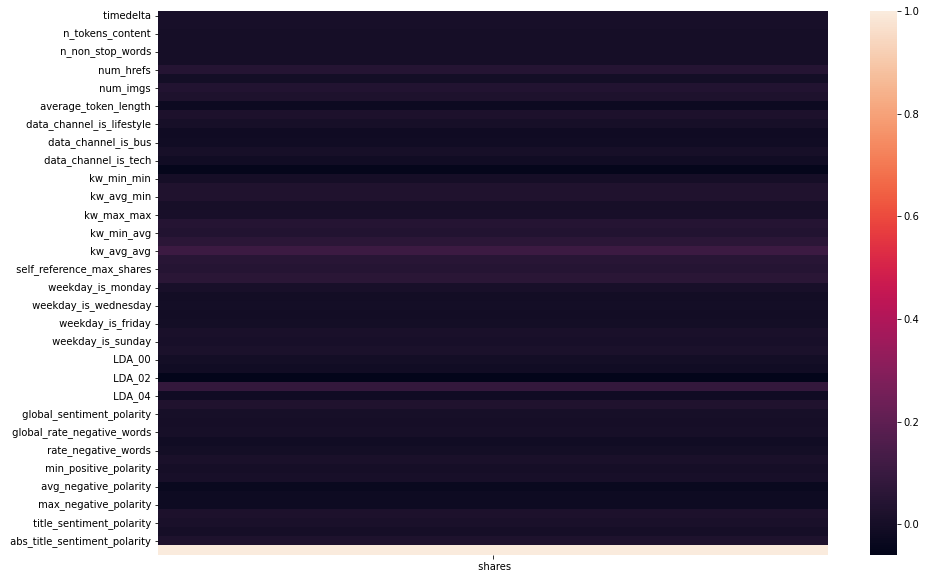

According to the above diagram, none of the attributes are highly correlated with the ```shares```. Hence, we should expect to obtain models with not too high scores.

### 4. **The Goal(s) of the predictions**
---

**Tools and Libraries:**
- Preprocessing: Pandas, Numpy
- Data Visualizing: Matplotlib, Seaborn
- Machine Learning: train_test_split, Scikit Learn - Linear Regression, SVM, XGBoost, AdaBoost Classifier, Random Forest Classifier
- ML Metrics: Accuracy, Confusion Matrix, Precision - Recall, F1 score

We will use various libraries and machine learning models for this project as well as implement optimizing procedures based on metrics to craft the best performing model. 

**Framework:**
- Data cleaning 
- Data visualizing 
- Applying Machine Learning
- Interpreting results
- Compare models

**Principles of ML models:**
- Linear Regression: plot dependent variable into a space of sum of independent variables and coefficient.

- SVM: Divide the training set into different groups based on euclidian distance. The model then assign each testing instances to existing groups.

- XGBoost:  distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

- AdaBoost Classifier: a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

- Random Forest Classifier: combines the output of multiple decision trees to reach a single result. It handles both classification and regression problems since it is very flexible.


**Project Goal**:

We want to understand what affects a post popularity, and what is the pattern for users when reading online articles like their approach to positive/negative articles; their attention span regarding long articles, and many more.  Moreover, this is a data science project where we as team learn to go through steps such as data preprocessing, data visualizing & analytics, and finally applying machine learning methods. We will be able to learn from each other advanced ML algorithms as well as ways to optimize them.



### 5. **Preliminary findings -- from EDA**

In [ ]:
news.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [ ]:
news.duplicated().sum()

0

In our dataset, there are no missing values and no duplicated records. Hence, we do not need to handle missing values and duplicated datas.

In [ ]:
news.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,binary,data_channel_is_others
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184,0.686611,0.154727
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749,0.463877,0.361649
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000,0.000000,0.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,1.000000,0.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000,1.000000,0.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,1.000000,1.000000


According to the above table, we can see that several features have vast gaps between mean, min, and max (for example, the features ```n_tokens_content```, ```n_non_stop_words```, ```n_non_stop_unique_tokens```, etc. Hence, there should be outliers in these features. 

Distribution plots will be used here to determine the skewness and outliers of the dataset.

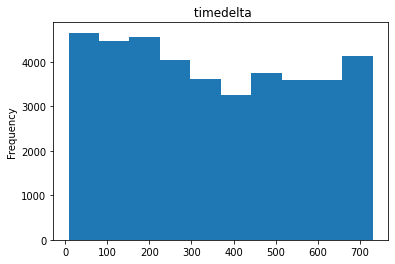

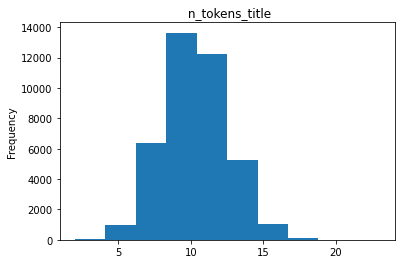

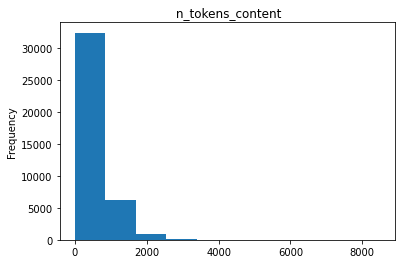

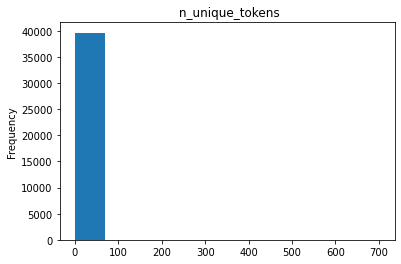

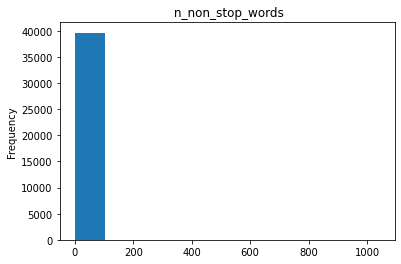

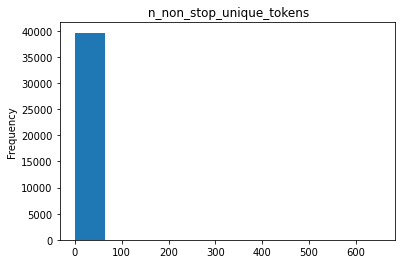

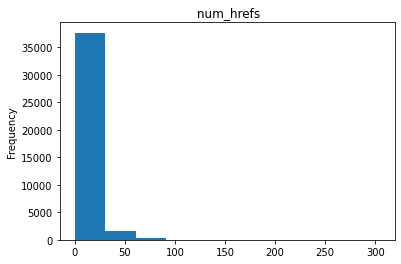

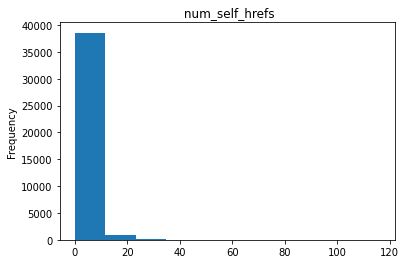

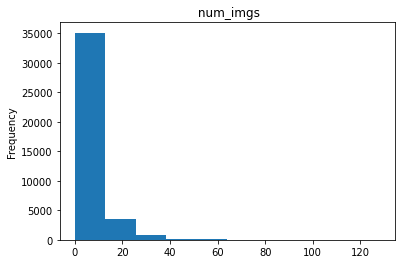

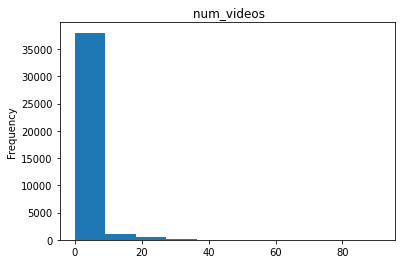

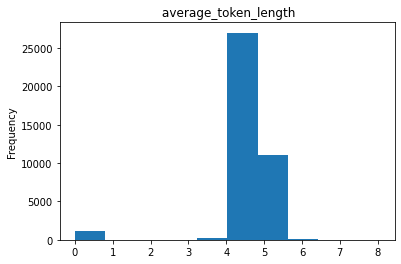

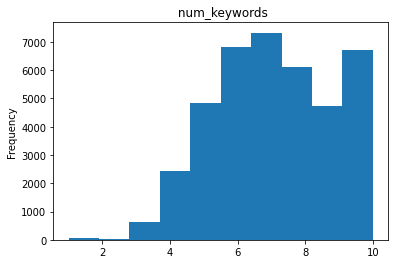

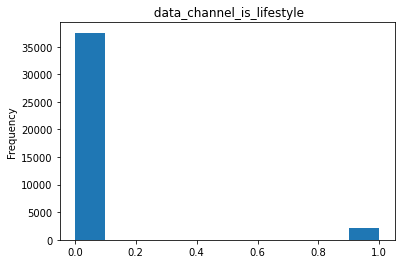

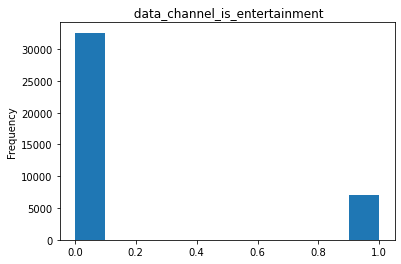

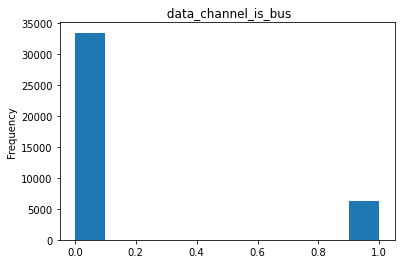

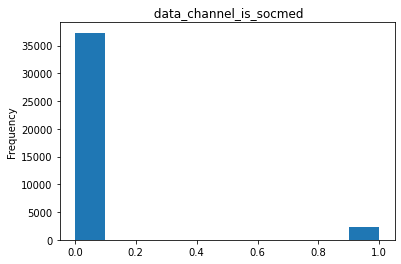

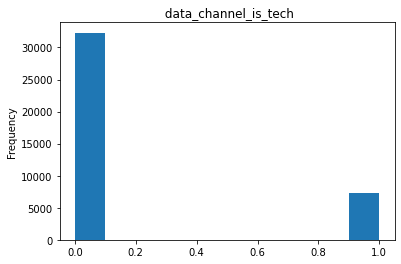

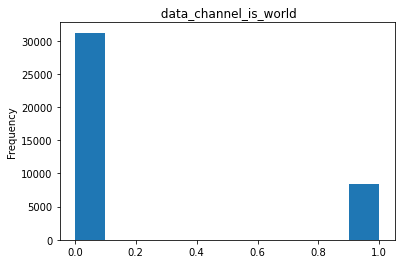

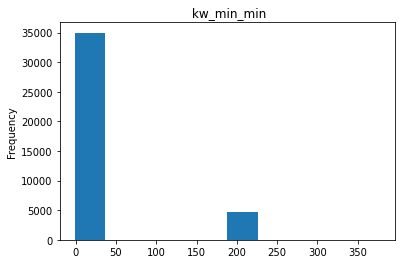

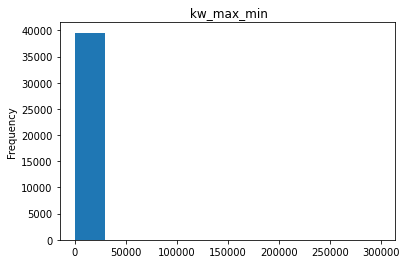

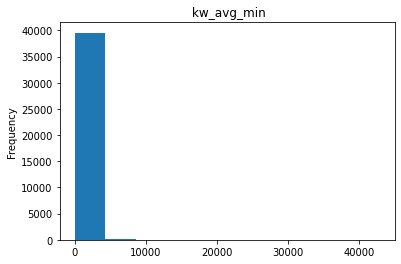

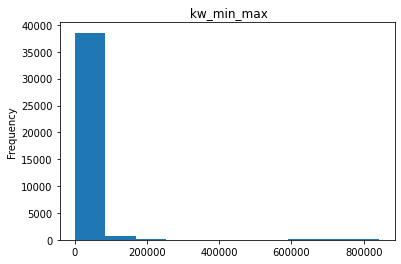

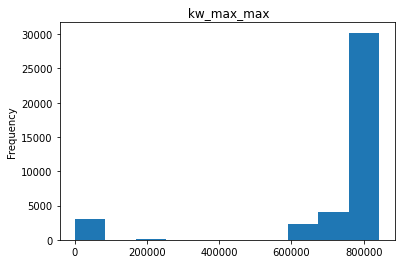

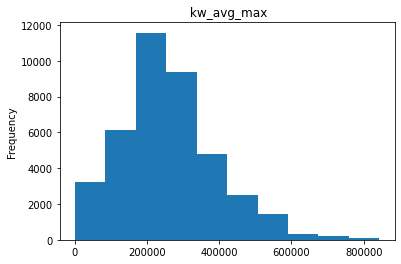

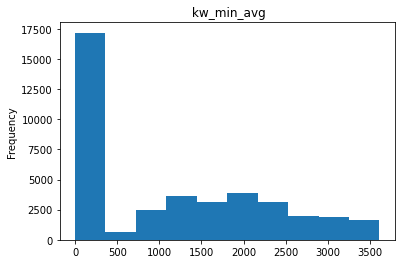

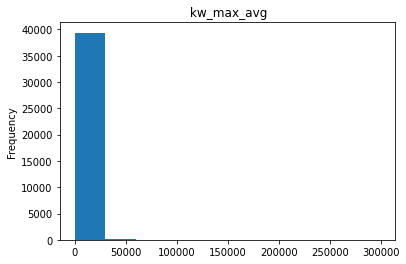

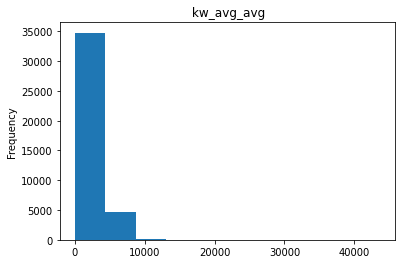

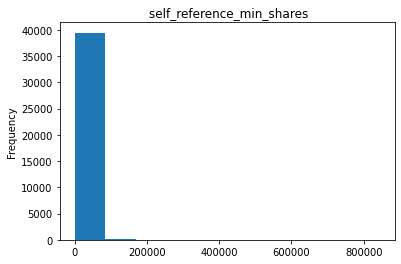

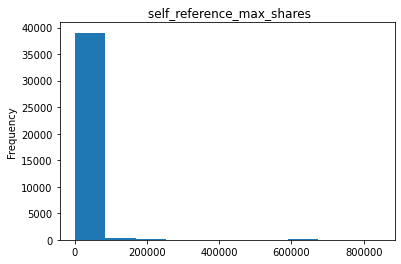

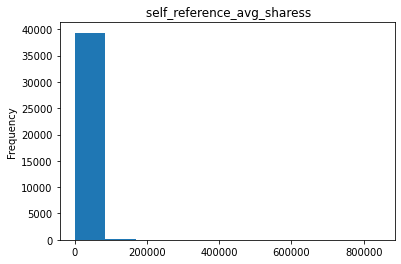

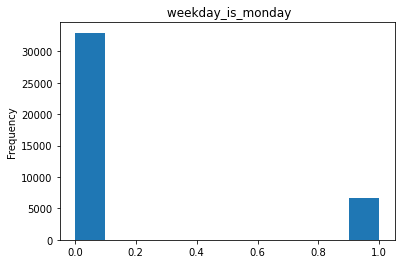

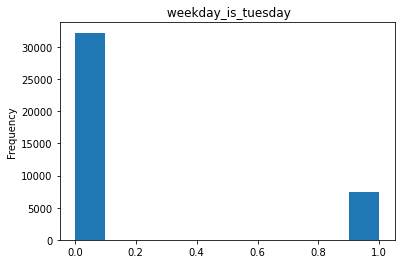

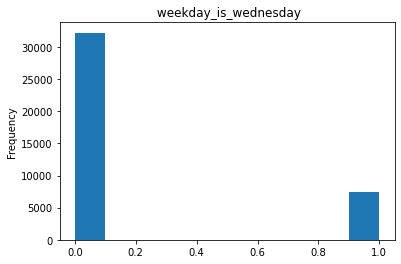

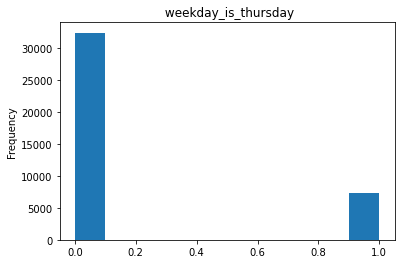

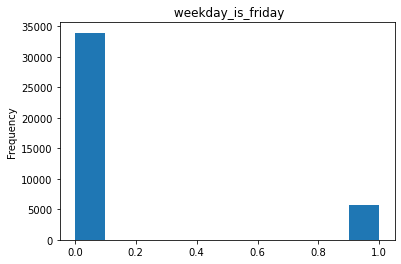

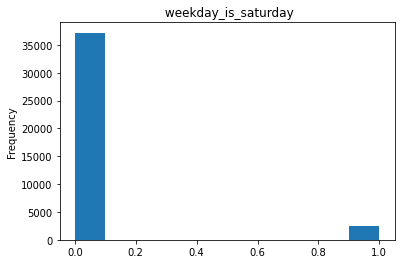

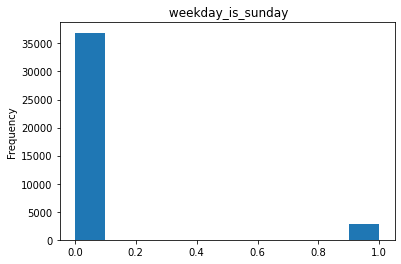

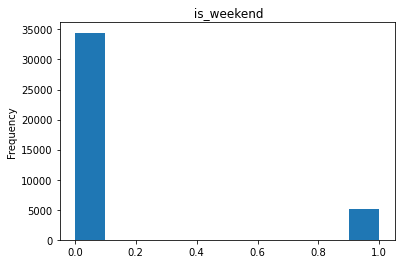

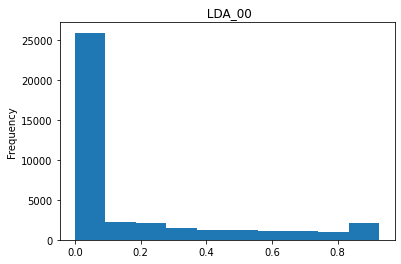

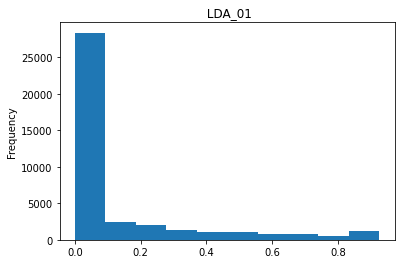

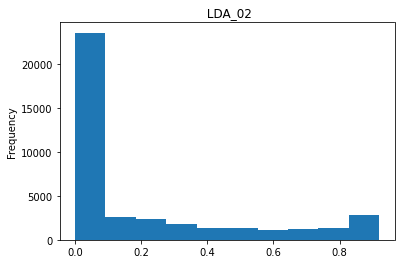

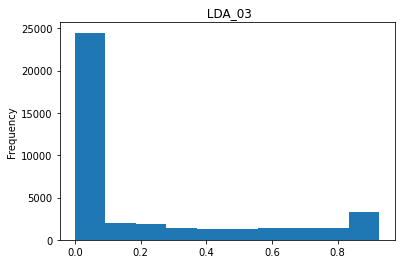

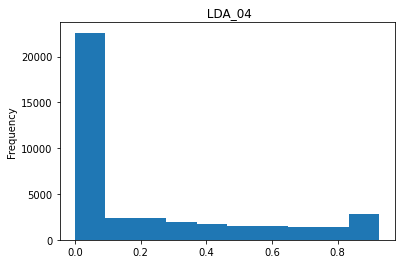

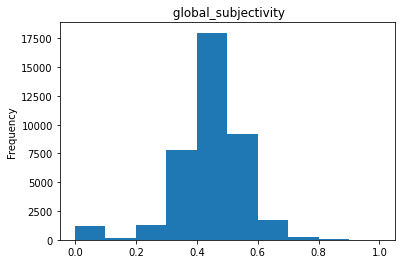

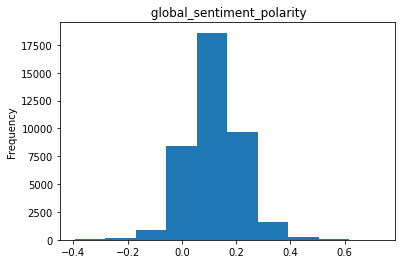

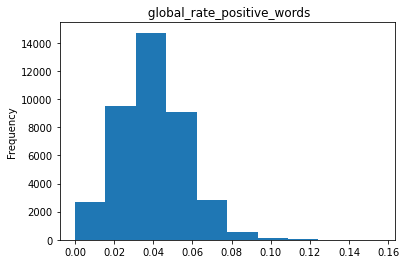

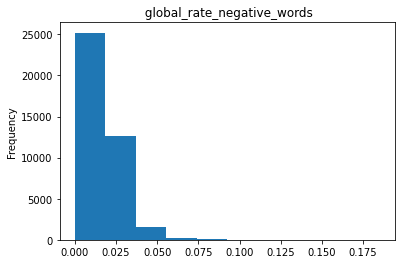

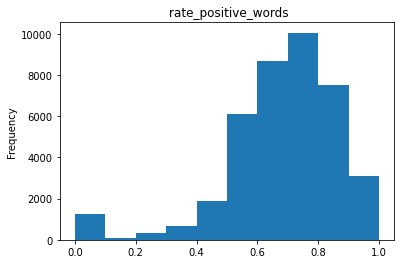

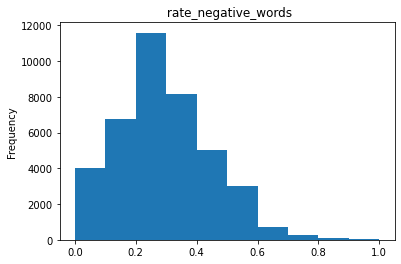

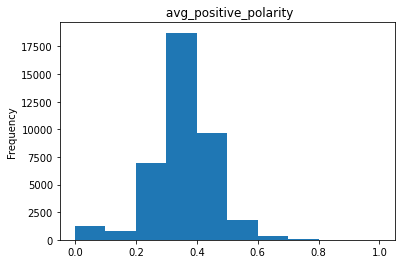

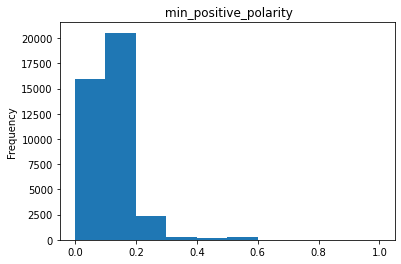

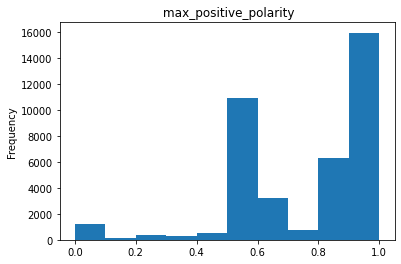

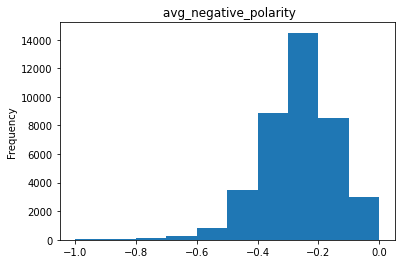

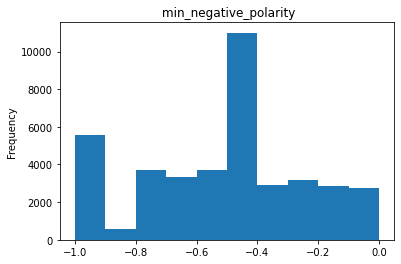

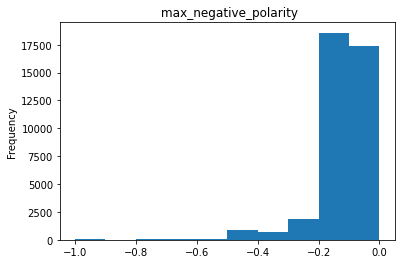

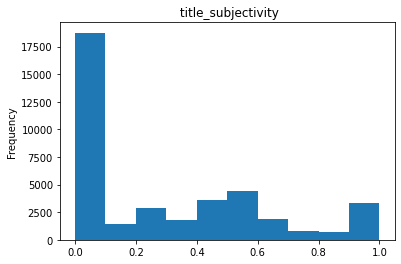

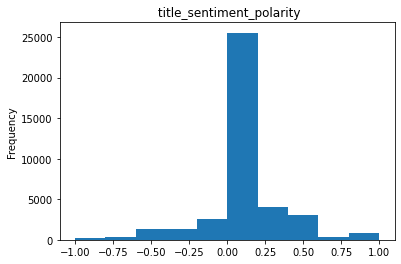

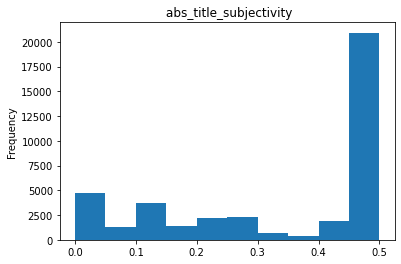

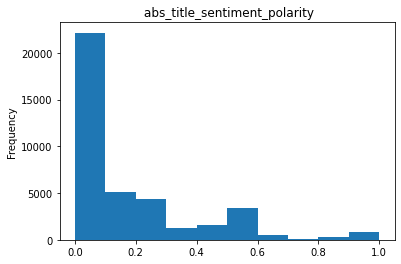

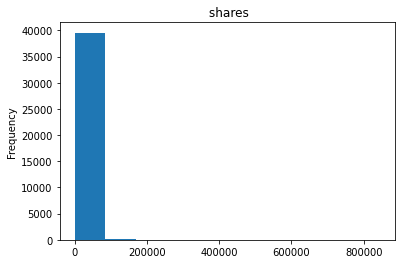

In [ ]:
import matplotlib.pyplot as plt
for col in news.columns:
    if news[col].dtypes != "O":
        news[col].plot.hist()
        plt.title(col)
        plt.show()

The outliers are essential values for our dataset; hence, we decided not to delete them. Instead, we will retain and transform them into normal distribution using box cox. A Box cox transformation is defined as a way to convert non-normal dependent variables in our data to a normal shape through which we can run many more tests than we could. 

We will evaluate this dataset's statistics for words, links and digital media, publication tim, and shares e attributes since they are basic and essential attributes. In addition, we will also determine the statistic of the target, i.e., shares.

* **Words**: Features about words can give us basic insight of words in each article.

In [ ]:
news1 = news[[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' average_token_length']]
news1.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,4.548239
std,2.114037,471.107508,3.520708,5.231231,3.264816,0.844406
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.478404
50%,10.000000,409.000000,0.539226,1.000000,0.690476,4.664082
75%,12.000000,716.000000,0.608696,1.000000,0.754630,4.854839
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,8.041534


The statistics of the numbers of tokens in the title are smaller than in the content. However, the min number of token in content means that there are still null values that cannot be detected by ```isnull()``` function. In the future, we will need to identify which article has the token numbers in content equal to 0 and delete them since they are missing values. 

Attributes ```n_unique_tokens```, ```n_non_stop_words```, and ```n_non_stop_unique_tokens``` are the rate of unique words in the content, rate of non-stop words in the content, and rate of unique non-stop words in the content. Their statistics show that their min, 25%, 50%, and 75% quantiles are relatively small compared to the max. This shows that they are skewed significantly to the left.

* **Links and digital media**: Features about number of links or link to other articles, count of images and videos.

In [ ]:
news2 = news[[' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos']]
news2.describe()

,num_hrefs,num_self_hrefs,num_imgs,num_videos
count,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.883690,3.293638,4.544143,1.249874
std,11.332017,3.855141,8.309434,4.107855
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000,0.000000
50%,8.000000,3.000000,1.000000,0.000000
75%,14.000000,4.000000,4.000000,1.000000
max,304.000000,116.000000,128.000000,91.000000


These attributes are the number of links and links to other articles published by Mashable, number of images, and number of videos, respectively. From the statistics, we can see that the links and digital media numbers are relatively small; most are smaller than 10. In more detail, the means number of links is 10, the number of links to other articles published by Mashable is 3, the number of images is 4 to 5, and the number of videos is 1. However, the maximum for all these is very high compared to their min, 25%, 50%, and 70% quantiles. We need to check this to see whether the number of links, number of images, and number of videos correlate to the length of the article. 

* **Publication time**: The day article was published. The data was converted into 7 dummies columns.

In [ ]:
news3 = news[[' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday']]
news3.describe()

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039
std,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Since these data are dummies data, the number for each attribute is 0 or 1 (0 for "no" and 1 for "yes"). However, we can still look at the statistics to compare different days in a week. For example, we can see that the mean on weekdays is higher than on weekends, which indicates that articles were published on weekdays more. 

* **Shares**: Number of share for each article, which will be used to indicate the popularity.

In [ ]:
news[[' shares']].describe()

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


The mean share is around 3395; however, the maximum share is 843300. In addition, there is a big gap between min and max values, and the 25%, 50%, and 70% quantiles are relatively lower than the max. Hence, there should be outliers for shares. There is also a very high standard deviation, around 12000. This high value indicates data are more widely spread. 

We also visualize the most important attributes to provide an interpretation for each chart. 

* **Publication time**: To visualize the publication time, we will create a new column to reverse all dummies variables of publication time into one attribute called ```publication_time```. Then, we will perform a barplot to see the relationship between publication time and article shares.

In [ ]:
publication_time = news[[' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday' , ' weekday_is_sunday']]
publication_time = publication_time.idxmax(axis=1)
publication_time.replace([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday' , ' weekday_is_sunday'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], inplace = True)

news['publication_time'] = publication_time

In [ ]:
news.groupby('publication_time')[' shares'].mean()

publication_time
Friday       3285.181021
Monday       3647.025822
Saturday     4078.185079
Sunday       3746.740592
Thursday     3178.599147
Tuesday      3202.500677
Wednesday    3303.405380
Name:  shares, dtype: float64

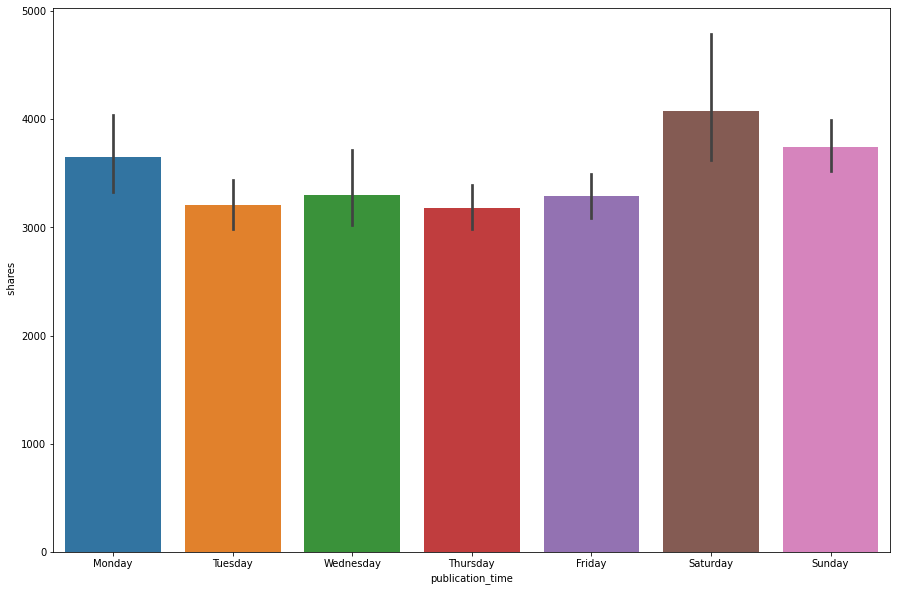

In [ ]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = news['publication_time'], y = news[' shares'])
plt.show()

Here, the average shares are roughly higher for items published on Saturday, Sunday, and Monday than for articles published on the other days.

* **Type of news**: Similarly to the publication time, we will reverse all dummy variables of type of news into one attribute called ```data_channel```. 

In [ ]:
data_channel = news[[' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world']]

# Create a new dummy column for others when all other column values of publication time is 0
data_channel_is_others = []
for i in list(range(data_channel.shape[0])):
    if (((data_channel.iloc[i, 0]) == 0) and ((data_channel.iloc[i, 1]) == 0) and ((data_channel.iloc[i, 2]) == 0) and ((data_channel.iloc[i, 3]) == 0) and ((data_channel.iloc[i, 4]) == 0) and ((data_channel.iloc[i, 5]) == 0)):
        data_channel_is_others.append(1)
    else:
        data_channel_is_others.append(0)
data_channel['data_channel_is_others'] = data_channel_is_others

data_channel = data_channel.idxmax(axis=1)
data_channel.replace([' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', 'data_channel_is_others'], ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Technology', 'World', 'Others'], inplace = True)

news['data_channel'] = data_channel
news['data_channel'].fillna('Others')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0        Entertainment
1             Business
2             Business
3        Entertainment
4           Technology
             ...      
39639       Technology
39640     Social Media
39641           Others
39642            World
39643    Entertainment
Name: data_channel, Length: 39644, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


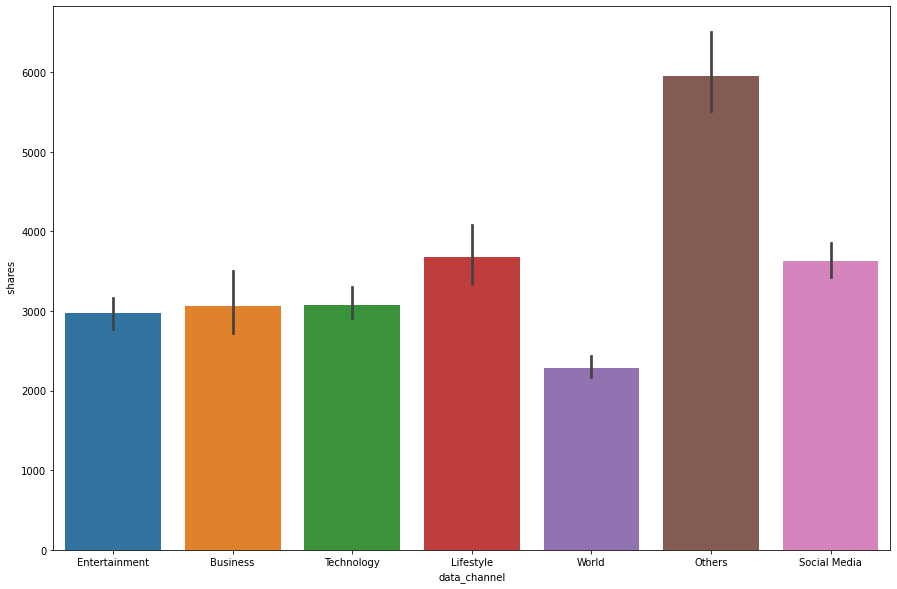

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(news['data_channel'], news[' shares'])
plt.show()

The max mean of shares is from others category.

Now, we will explore relationships between attributes

Firstly, I use heatmap to describe the overall relationship between all attributes and target ```shares```.

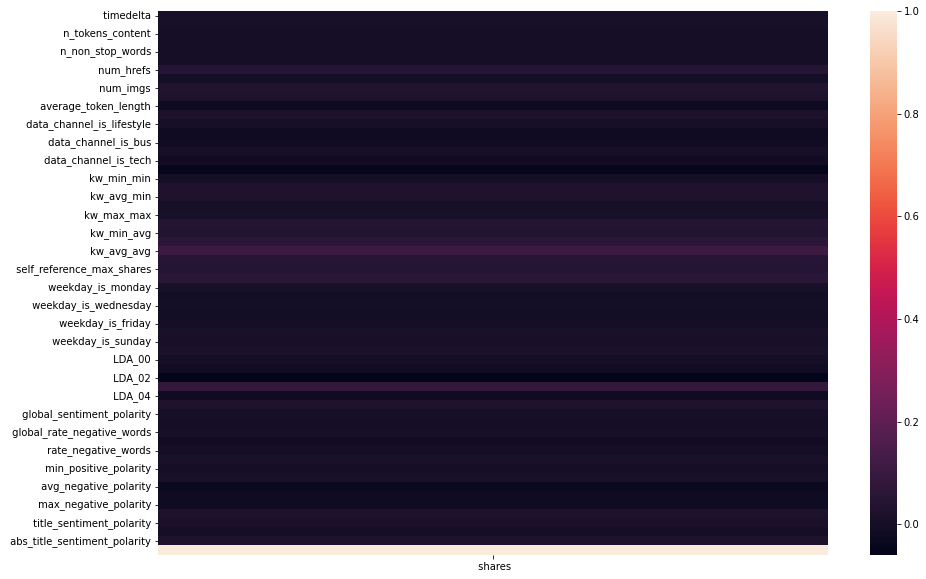

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame(news.corr()[' shares']))
plt.show()

According to the above diagram, none of the attributes are highly correlated with the ```shares```. Hence, we should expect to obtain models with not too high scores.

Now, we will look at the relationship between continuous attributes and ```shares```

* Relationship between **words** attributes and ```shares```

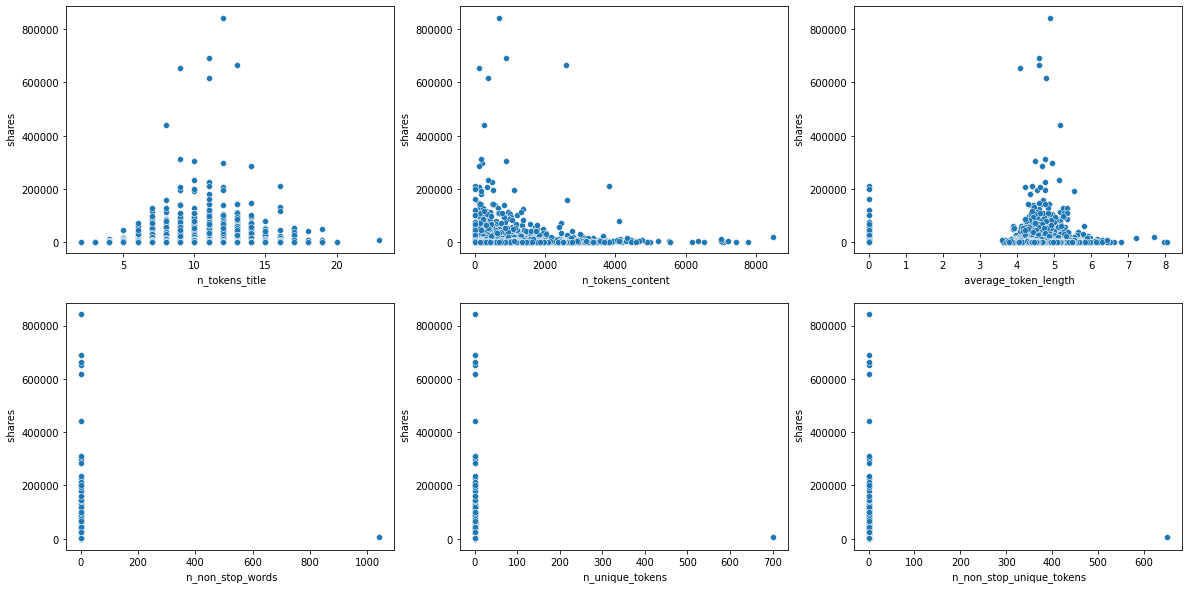

In [ ]:
words = [' n_tokens_title', ' n_tokens_content', ' average_token_length', ' n_non_stop_words', ' n_unique_tokens', ' n_non_stop_unique_tokens']
plt.figure(figsize = (20, 10))
a = 1
for i in words:
    plt.subplot(2, 3, a)
    a += 1
    sns.scatterplot(data = news, x = i, y = ' shares')
plt.show()

Here, it is obvious that only three attributes - ```n_tokens_title```, ```n_tokens_content```, and ```average_token_length``` - have a relationship with the number of shares, while the other features are unaffected and remain constant. Additionally, the skewness in the three columns below can be seen to be caused by a single data point.

* Relationship between **links and digital media** attributes and ```shares```

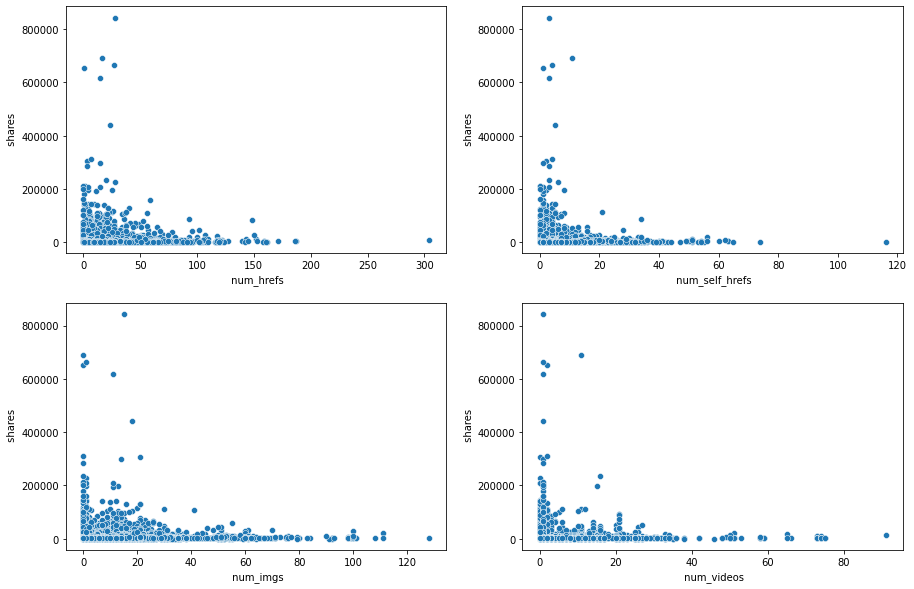

In [ ]:
linkMedia = [' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos']
plt.figure(figsize = (15, 10))
a = 1
for i in linkMedia:
    plt.subplot(2, 2, a)
    a += 1
    sns.scatterplot(data = news, x = i, y = ' shares')
plt.show()

There is a similar trend in all four graphs above. One conclusion that may be drawn from this is that more shares are generated when there are fewer photos, videos, self-reference links, or hrefs.

* Relationship between **keywords** attributes and ```shares```

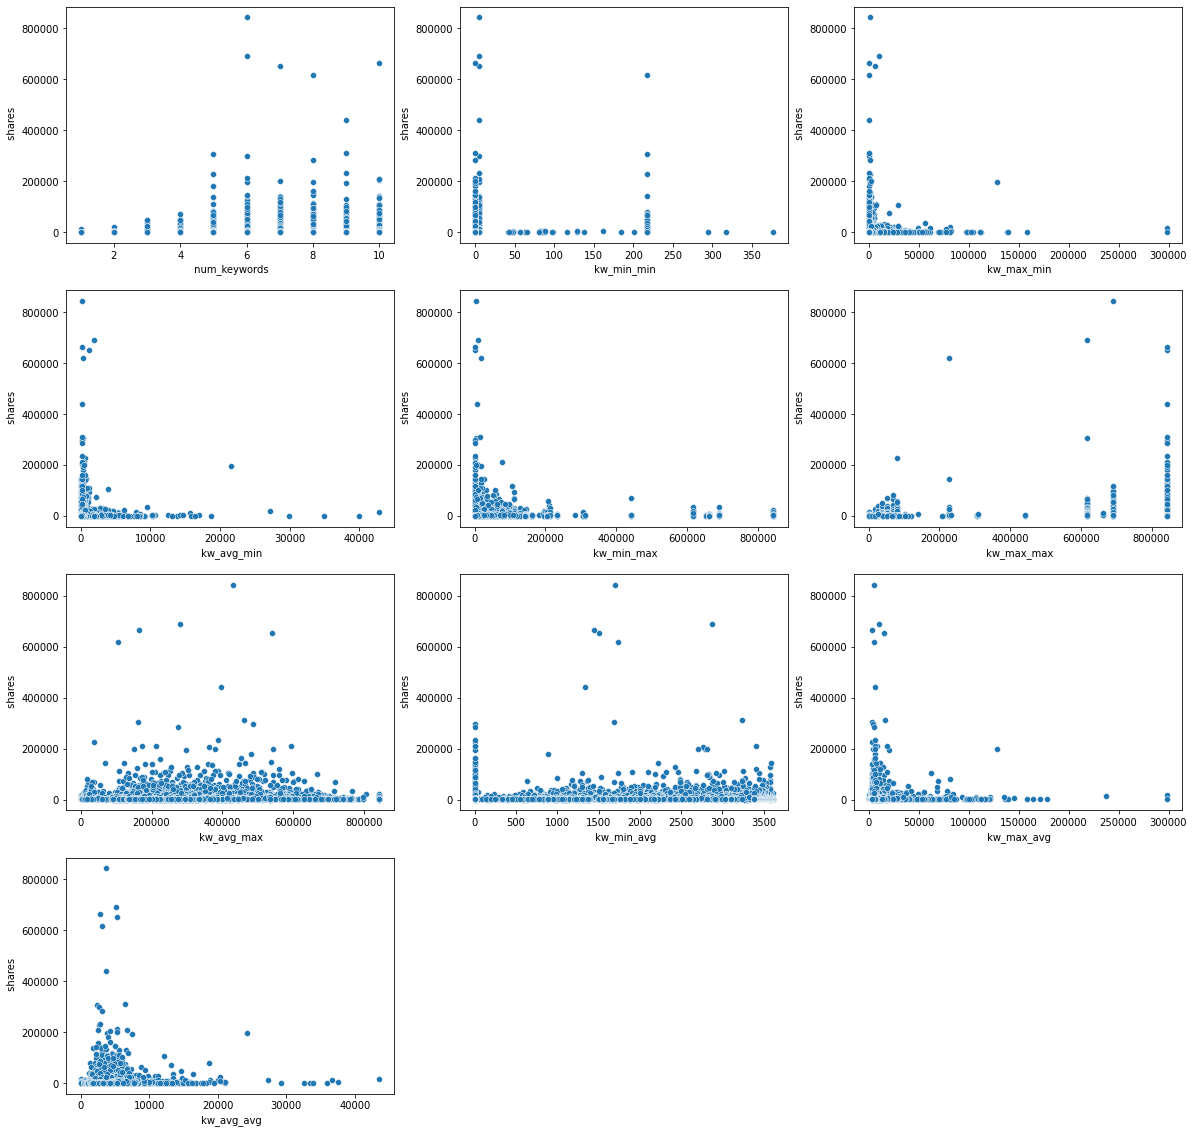

In [ ]:
keywords = [' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg']
plt.figure(figsize = (20, 20))
a = 1
for i in keywords:
    plt.subplot(4, 3, a)
    a += 1
    sns.scatterplot(data = news, x = i, y = ' shares')
plt.show()

The graphs below show that keywords attributes seem to have no relationship to the number of shares.

Now, we will look at the most fundamental attribute of the keyword, the ```num_keywords```, which is the number of keywords in the metadata. 

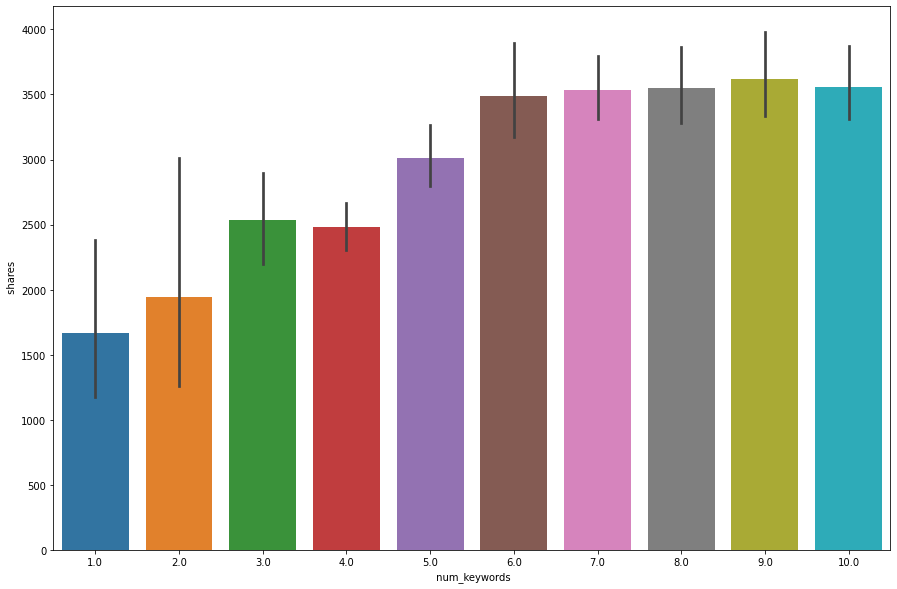

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x = news[' num_keywords'], y = news[' shares'])
plt.show()

We can see that the more the number of keywords, the more the number of shares.

* Relationship between **NLP** attributes and ```shares```

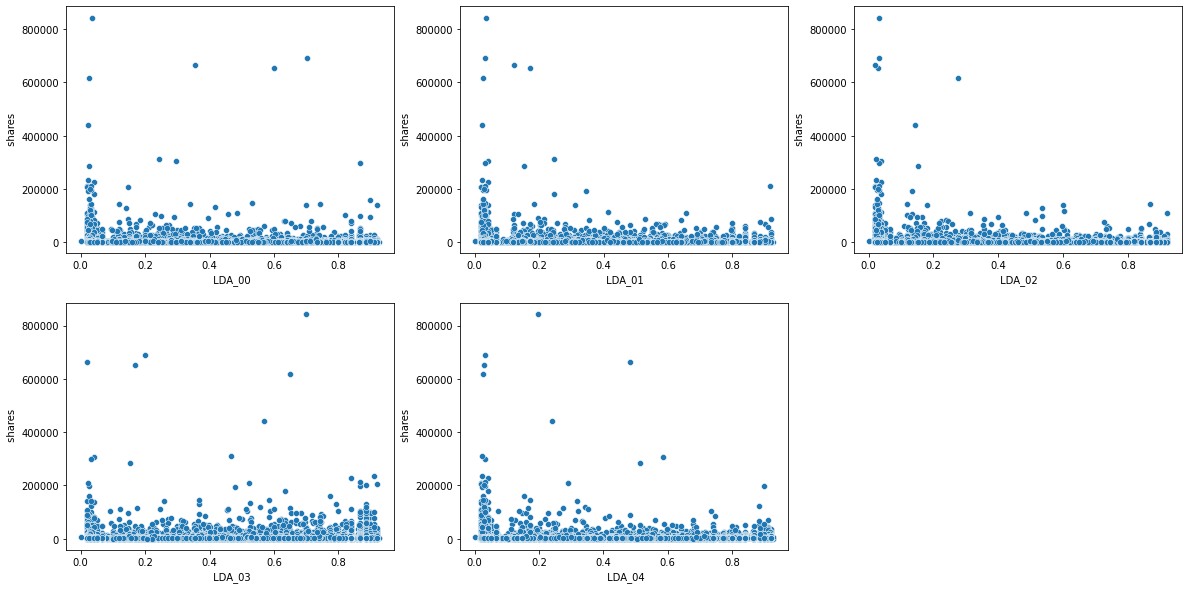

In [ ]:
closeness_lda = [' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04']
plt.figure(figsize = (20, 10))
a = 1
for i in closeness_lda:
    plt.subplot(2, 3, a)
    a += 1
    sns.scatterplot(data = news, x = i, y = ' shares')
plt.show()

Shares do not rely on the closeness of the LDA.

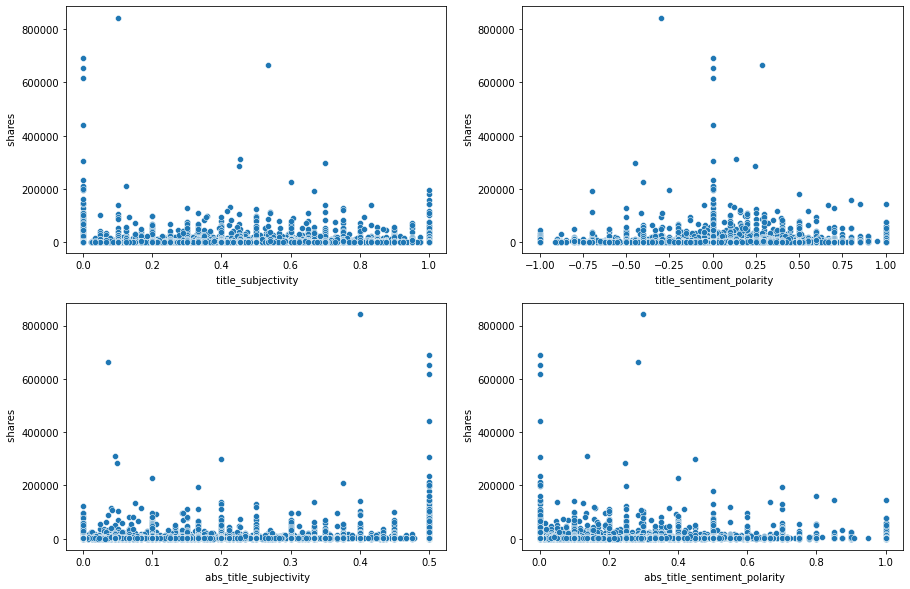

In [ ]:
title = [' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity']
plt.figure(figsize = (15, 10))
a = 1
for i in title:
    plt.subplot(2, 2, a)
    a += 1
    sns.scatterplot(data = news, x = i, y = ' shares')
plt.show()

According to the four above graphs, ```title_subjectivity``` shows that the lesser the title subjectivity, the more the no of shares. With ```title_sentiment_polarity```, neutral words in the title get more no of shares. For ```abs_title_subjectivity```, the higher the abs_title_subjectivity, the higher the number of shares. Finally, titles with almost 0 ```abs_title_sentiment_polarity``` have higher shares.

There are also some interesting relationships between features and the shares.

* **Publication time** classified based on the median of ```shares``` as a threshold: Here, we will assume that the median of ```shares``` is the threshold for popular and unpopular articles. We do not use mean since it is usually inappropriate when the dataset is skewed like this dataset.

The threshold is 1400.0


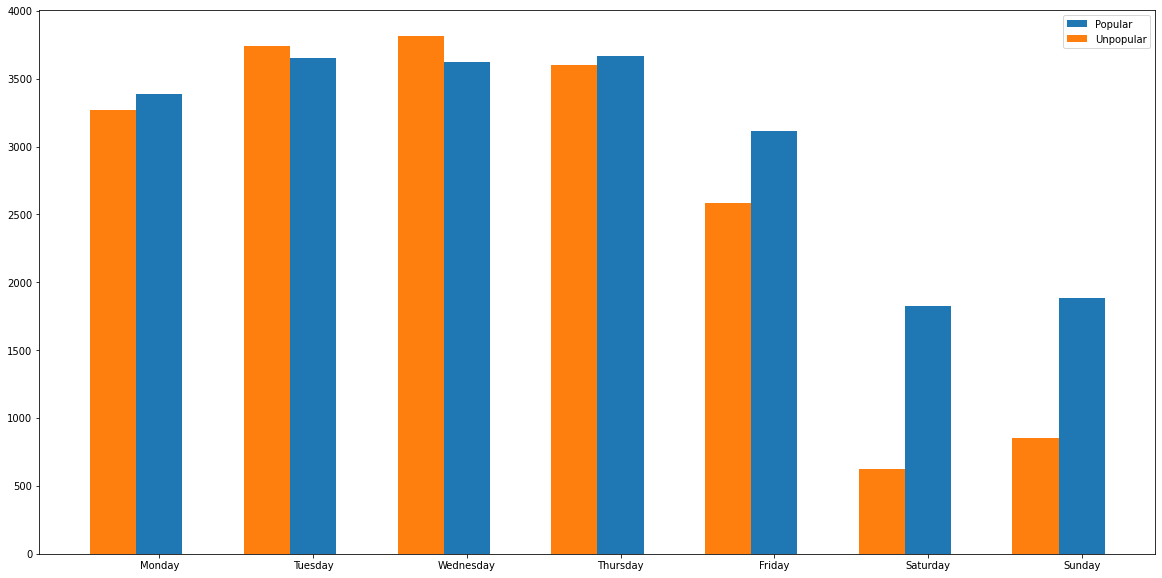

In [ ]:
import numpy as np

threshold = news[' shares'].median()
print('The threshold is', threshold)

pt = [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday' , ' weekday_is_sunday']
unpop = news[news[' shares'] < threshold][pt].sum().values
pop = news[news[' shares'] >= threshold][pt].sum().values

fig = plt.figure(figsize = (20, 10))
plt.bar(np.arange(len(pt)), pop, width = 0.3, label = 'Popular')
plt.bar(np.arange(len(pt)) - 0.3, unpop, width = 0.3, label = 'Unpopular')
plt.xticks(np.arange(len(pt)), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) 
plt.legend(loc = 'upper right')
plt.show()

Suppose we use the median as the threshold to classify our shares into popular and unpopular. In that case, we can see that the popularity rates on weekends are more significant than on weekdays (nearly twice the rate of unpopularity). However, the shares on weekends are lower than on weekdays. The values and proportion of shares on Monday, Tuesday, Wednesday, and Thursday are similar.

* **Data channel** classified based on the median of ```shares``` as a threshold

The threshold is 1400.0


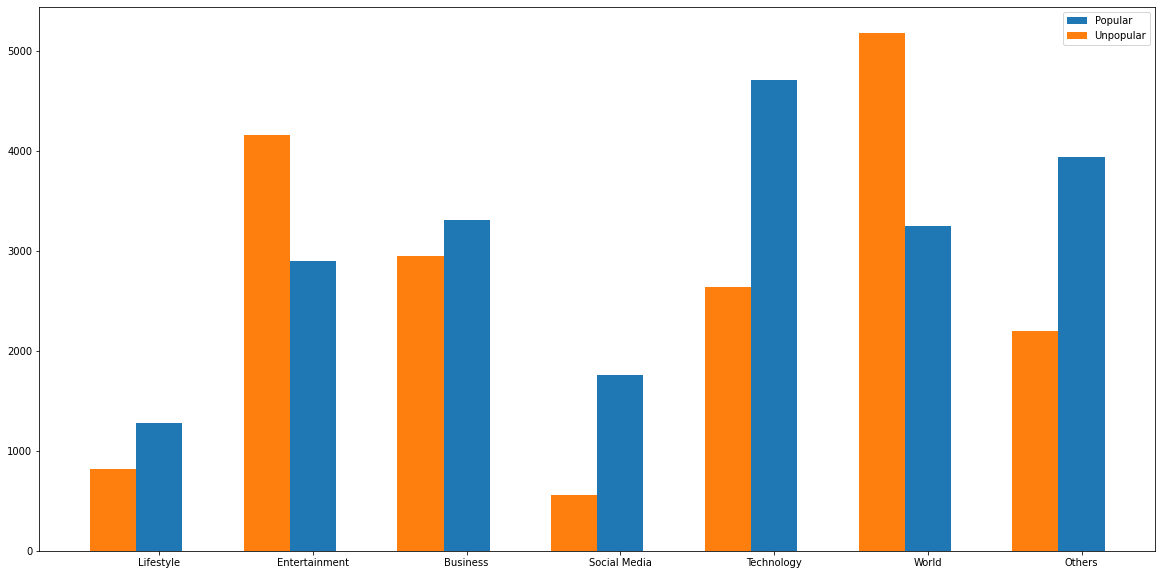

In [ ]:
import numpy as np

news['data_channel_is_others'] = data_channel_is_others

threshold = news[' shares'].median()
print('The threshold is', threshold)

dc = [' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', 'data_channel_is_others']
unpop = news[news[' shares'] < threshold][dc].sum().values
pop = news[news[' shares'] >= threshold][dc].sum().values

fig = plt.figure(figsize = (20, 10))
plt.bar(np.arange(len(dc)), pop, width = 0.3, label = 'Popular')
plt.bar(np.arange(len(dc)) - 0.3, unpop, width = 0.3, label = 'Unpopular')
plt.xticks(np.arange(len(dc)), ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Technology', 'World', 'Others']) 
plt.legend(loc = 'upper right')
plt.show()

Suppose we use the median as the threshold to classify our shares into popular and unpopular. In that case, we can see that the popularity rates in Lifestyle, Business, Social Media, Technology, and Others are higher than the rate of unpopularity. Technology is the data channel that has the highest popularity rate.

In order to perform EDA, we have already added three new features to the data: ```publication_time```, ```data_channel_is_others```, and ```data_channel```. These data do not add any further information and might not be used for model training (we use the dummy variable of ```publication_time``` and ```data_channel``` rather than their variables). 

So far, the features in the dataset are already pre-processed and contain relatively enough information for us to build our model. However, in the future, we would add more pre-processing after exploratory data analysis, even after modeling, if necessary.

### 6. **Training Models**

#### New Target for Classification

As shown in the EDA part, our dataset does not have normal distribution and there are several outliers. Hence, we use the log transformation to transform the ```shares``` to have a normal distribution as close as possible, and then use that number to classify dataset into different popularity levels.

In [ ]:
import numpy as np
np.log10(news[' shares']).describe()

count    39644.000000
mean         3.246288
std          0.404105
min          0.000000
25%          2.975891
50%          3.146128
75%          3.447158
max          5.925982
Name:  shares, dtype: float64

As we mentioned above, we will use the following 2 target variables:
* Binary Classification: Target variable has two classes.
* Multiple Classification: The target variable is a category variable that can be classified into several classes.

In [ ]:
import math
classification = np.log10(news[' shares'])
# 2 Classes
news['binary'] = (classification<=3)*0 | (classification>3)*1
# Multiple Classes (4 classes)
#1: 1st quartile
#2: 2nd quartile
#3: 3rd quartile
#4: 4th quartile 
news['multiple'] = pd.cut(classification, bins = [-math.inf, 2.975891, 3.146128, 3.447158, math.inf], labels=[1,2,3,4])

The graphs below show the distribution of different classes.

In [ ]:
import matplotlib.pyplot as plt

plt.hist(news['binary'])
plt.show()

plt.hist(news['multiple'])
plt.show()

#### 6.1. **Predicting on Two Classes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, plot_confusion_matrix
from numpy import argmax

For binary classification, we use 70% for training, 15% for tuning, and 15% for tetsing (changing threshold).

In [ ]:
X = news.drop([" shares", "url", " timedelta", "publication_time", "data_channel_is_others", "data_channel", "binary", "multiple"], axis = 1)
y = news["binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42, stratify = y)
X_train, X_tuning, y_train, y_tuning = train_test_split(X_train, y_train, test_size = 0.15/0.7, random_state = 42, stratify = y_train)

In [ ]:
models = []
acc = []
f1 = []

In [ ]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype("int")

##### SVM

In [ ]:
from sklearn.svm import SVC
SVM = SVC(random_state = 42, probability = True)
SVM.fit(X_train, y_train)

SVC(probability=True, random_state=42)

Best Threshold = 0.4281448996796799, F-Score = 0.8141883570079645


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


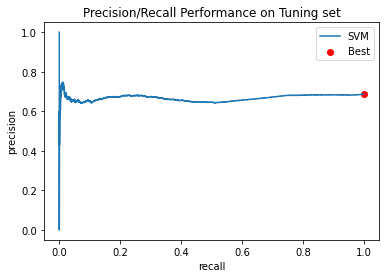

In [ ]:
predictProba = SVM.predict_proba(X_tuning)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'SVM')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.title("Precision/Recall Performance on Tuning set")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

Best Threshold = 0.4281448996796799, F-Score = 0.8141883570079645


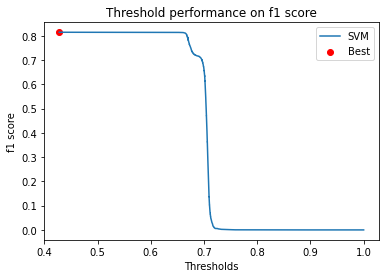

In [ ]:
# locate the index of the largest f score
thresholds = np.insert(thresholds,thresholds.shape,1)
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(thresholds, fSscores, label = 'SVM')
plt.scatter(thresholds[ix], fSscores[ix], marker = 'o', color = 'red', label = 'Best')
plt.title("Threshold performance on f1 score")
plt.xlabel('Thresholds')
plt.ylabel('f1 score')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = SVM.predict_proba(X_test)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test, y_pred))
print("confusion matrix\n", confusion_matrix(y_test, y_pred))
print("precision score =", precision_score(y_test, y_pred))
print("recall score =", recall_score(y_test, y_pred))
print("f1 score =", f1_score(y_test, y_pred))

accuracy score = 0.6863965024382042
confusion matrix
 [[   0 1864]
 [   1 4082]]
precision score = 0.6865119408005381
recall score = 0.9997550820475141
f1 score = 0.8140392860703958


In [ ]:
models.append("SVM")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

##### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier().fit(X_train, y_train)

Best Threshold = 0.0, F-Score = 0.8141883570079645


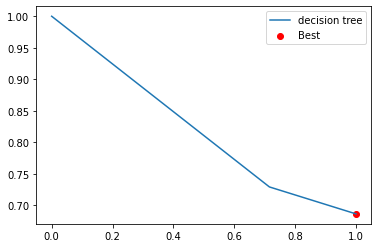

In [ ]:
predictProba = dtree_model.predict_proba(X_tuning)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'decision tree')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = dtree_model.predict_proba(X_test)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test, y_pred))
print("confusion matrix\n", confusion_matrix(y_test, y_pred))
print("precision score =", precision_score(y_test, y_pred))
print("recall score =", recall_score(y_test, y_pred))
print("f1 score =", f1_score(y_test, y_pred))

accuracy score = 0.6865646544476206
confusion matrix
 [[   0 1864]
 [   0 4083]]
precision score = 0.6865646544476206
recall score = 1.0
f1 score = 0.8141575274177467


In [ ]:
models.append("Decision Tree")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)

Best Threshold = 0.47, F-Score = 0.8208600826664322


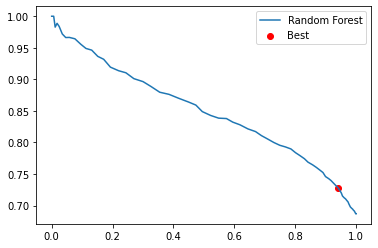

In [ ]:
predictProba = rfc.predict_proba(X_tuning)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'Random Forest')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = rfc.predict_proba(X_test)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test, y_pred))
print("confusion matrix\n", confusion_matrix(y_test, y_pred))
print("precision score =", precision_score(y_test, y_pred))
print("recall score =", recall_score(y_test, y_pred))
print("f1 score =", f1_score(y_test, y_pred))

accuracy score = 0.7190179922650076
confusion matrix
 [[ 432 1432]
 [ 239 3844]]
precision score = 0.7285822592873389
recall score = 0.9414646093558657
f1 score = 0.8214552836841542


In [ ]:
models.append("Random Forest")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

##### Extreme Gradient Boosting (XGBoost)

In [ ]:
import xgboost as xgb
XGBoost = xgb.XGBClassifier()
XGBoost.fit(X_train, y_train)

XGBClassifier()

Best Threshold = 0.43682950735092163, F-Score = 0.8218584913830431


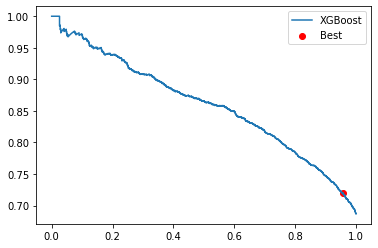

In [ ]:
predictProba = XGBoost.predict_proba(X_tuning)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'XGBoost')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = XGBoost.predict_proba(X_test)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test, y_pred))
print("confusion matrix\n", confusion_matrix(y_test, y_pred))
print("precision score =", precision_score(y_test, y_pred))
print("recall score =", recall_score(y_test, y_pred))
print("f1 score =", f1_score(y_test, y_pred))

accuracy score = 0.7156549520766773
confusion matrix
 [[ 356 1508]
 [ 183 3900]]
precision score = 0.7211538461538461
recall score = 0.9551800146950772
f1 score = 0.8218312085133284


In [ ]:
models.append("XGBoost")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

##### K Nearest Neighbour (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
f1KNN = []
maxF1 = 0
iMax = 0

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train ,y_train)
    y_pred = knn.predict(X_test)
    score = f1_score(y_test, y_pred)
    if score >= maxF1:
        iMax = i

In [ ]:
knn = KNeighborsClassifier(iMax)
knn.fit(X_train ,y_train)

KNeighborsClassifier(n_neighbors=14)

Best Threshold = 0.21428571428571427, F-Score = 0.8144126357354392


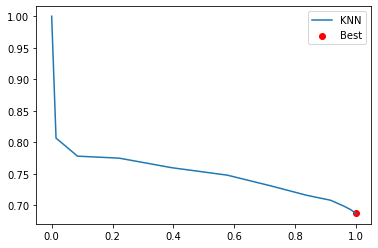

In [ ]:
predictProba = knn.predict_proba(X_tuning)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'KNN')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = knn.predict_proba(X_test)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test, y_pred))
print("confusion matrix\n", confusion_matrix(y_test, y_pred))
print("precision score =", precision_score(y_test, y_pred))
print("recall score =", recall_score(y_test, y_pred))
print("f1 score =", f1_score(y_test, y_pred))

accuracy score = 0.6874054144947032
confusion matrix
 [[  10 1854]
 [   5 4078]]
precision score = 0.6874578556979096
recall score = 0.9987754102375704
f1 score = 0.8143784323514728


In [ ]:
models.append("K Nearest Neighbour")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

##### Gaussian Naives Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

Best Threshold = 0.014273106683331526, F-Score = 0.8144736842105263


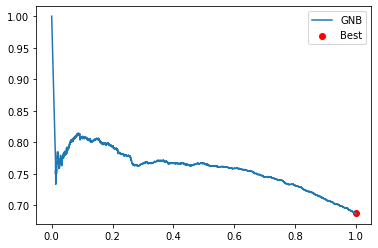

In [ ]:
predictProba = gnb.predict_proba(X_tuning)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'GNB')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = gnb.predict_proba(X_test)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test, y_pred))
print("confusion matrix\n", confusion_matrix(y_test, y_pred))
print("precision score =", precision_score(y_test, y_pred))
print("recall score =", recall_score(y_test, y_pred))
print("f1 score =", f1_score(y_test, y_pred))

accuracy score = 0.6874054144947032
confusion matrix
 [[  13 1851]
 [   8 4075]]
precision score = 0.68764765440432
recall score = 0.9980406563801126
f1 score = 0.8142671595563993


In [ ]:
models.append("Gaussian Naives Bayes")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Best Threshold = 0.40867021371656304, F-Score = 0.8143948730589105


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


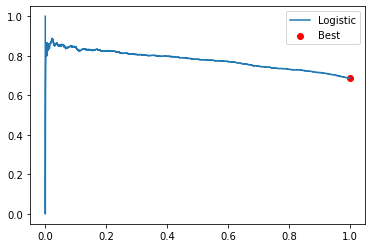

In [ ]:
predictProba = LR.predict_proba(X_tuning)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'Logistic')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [ ]:
predictProba = LR.predict_proba(X_test)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test, y_pred))
print("confusion matrix\n", confusion_matrix(y_test, y_pred))
print("precision score =", precision_score(y_test, y_pred))
print("recall score =", recall_score(y_test, y_pred))
print("f1 score =", f1_score(y_test, y_pred))

accuracy score = 0.6867328064570372
confusion matrix
 [[   2 1862]
 [   1 4082]]
precision score = 0.6867429340511441
recall score = 0.9997550820475141
f1 score = 0.8142016555300688


In [ ]:
models.append("Logistic Regression")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

Interpreting LR results

In [ ]:
print(LR.coef_, LR.intercept_)


[[ 5.88527293e-07  2.70508778e-04  2.04552490e-07  4.24388171e-07
   2.11465802e-07  8.28121521e-06  1.29498651e-06  2.18144501e-06
  -4.90728906e-07  4.68385556e-07  2.12113288e-06  8.21374142e-08
  -4.96936834e-07  1.29653314e-07  2.88056807e-07  5.60660599e-07
  -4.71786409e-07  5.54109506e-05 -9.64806578e-06  9.54352727e-05
  -2.08476649e-08 -8.25382142e-07 -1.20751587e-06 -5.53052949e-05
  -9.13853563e-05  6.74734470e-04  4.45223016e-06  8.80343805e-08
   1.02968648e-05 -6.16322688e-08 -1.29995851e-07 -2.11067077e-07
  -1.29083268e-07  7.63182782e-08  3.02897469e-07  2.94396469e-07
   5.97293938e-07  2.64031354e-07 -1.87653721e-07 -3.05752843e-07
  -5.63258098e-08  4.27241964e-07  1.09545260e-07  8.04797329e-08
   1.57562199e-08 -2.09341153e-09  1.95325423e-07 -7.65941230e-08
   5.10772106e-08 -2.07134035e-08  1.73002914e-07 -1.61808586e-08
  -3.94879177e-08 -4.80086050e-09  8.06633593e-08  1.05302332e-07
   6.45210353e-08  7.10132917e-08]] [1.41833751e-07]


In [ ]:
LR_coeff = pd.DataFrame(data=LR.coef_[0],index=X_train.columns,columns=['Coefficient'])

In [ ]:
(LR_coeff.nlargest(5, 'Coefficient'))

,Coefficient
kw_avg_avg,0.000675
n_tokens_content,0.000271
kw_avg_min,0.000095
kw_min_min,0.000055
self_reference_avg_sharess,0.000010


##### Neural Network Regression

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

In [ ]:
# number of features (len of X cols)
input_dim = len(X.columns)
# number of classes (unique of y)
output_dim = 1 # one output node for regression model

class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.Sigmoid = nn.Sigmoid()
        self.ReLU = nn.ReLU(inplace = True)
        self.Dropout = nn.Dropout(0.4)
        
        # input >> hidden 1
        self.linear = nn.Linear(input_dim, round(1.5*input_dim))
        
        # hidden 1 >> output
        self.linear2 = nn.Linear(round(1.5*input_dim), output_dim)
        
    def forward(self, input, train=False):
        if train:
            input = self.Dropout(input)
        sig1 = self.ReLU(self.linear(input))
        if train:
            sig1 = self.Dropout(sig1)
        y = self.Sigmoid(self.linear2(sig1))
        return y

In [ ]:
device = torch.device("cpu")
class dataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        if not torch.is_tensor(X) and not torch.is_tensor(y.values):
            self.X = torch.tensor(X, dtype=torch.float32).to(device)
            self.y = torch.tensor(y.values, dtype=torch.float32).to(device)

    def __len__(self):
        return len(self.X)

    def getitem(self):
        return self.X, self.y

In [ ]:
import pickle

network = net()
network.to(torch.device("cpu"))

scaler = StandardScaler()

X_trainNN = scaler.fit_transform(X_train)
X_tuningNN = scaler.transform(X_tuning)
X_testNN = scaler.transform(X_test)

X_trainNN, y_trainNN = dataset(X_trainNN, y_train).getitem()
X_tuningNN, y_tuningNN = dataset(X_tuningNN, y_tuning).getitem()
X_testNN, y_testNN = dataset(X_testNN, y_test).getitem()

y_trainNN = y_trainNN.unsqueeze(1) # change dimension
y_tuningNN = y_tuningNN.unsqueeze(1)
y_testNN = y_testNN.unsqueeze(1)

if __name__ == '__main__':

    epochs = 2000 # 2000,5000,10000
    lr = 0.01 # 0.15 0.10 0.05

    floss = nn.MSELoss() 

    optimizer = torch.optim.Adam(network.parameters(), lr = lr) 
    current_loss = 0 
    plot_every = 10 

    all_losses = [] 
    f1_train = []
    f1_tun = []

    best_max_F1_train = 0
    best_max_F1_tun = 0

    for epoch in range(epochs): 
        yhat = network.forward(X_trainNN, train=True)

        # calculate MSE loss   
        loss = floss(yhat, y_trainNN)
        
        # backpropogate through the loss gradiants   
        loss.backward()
        
        # update model weights   
        optimizer.step()
        
        # remove current gradients for next iteration   
        optimizer.zero_grad() 
    
        # append to loss   
        current_loss += loss  

        if epoch % plot_every == 0:       
            with torch.no_grad():

                #training
                yhat = network.forward(X_trainNN).detach()
                precision, recall, thresholds = precision_recall_curve(y_trainNN, yhat)
                F1_score_train = []
                for i in range(len(precision)):
                    if precision[i] + recall[i] == 0:
                        F1_score_train.append(0)
                    else:
                        F1_score_train.append((2 * precision[i] * recall[i])/(precision[i] + recall[i]))
                max_F1_score_train = max(F1_score_train)
                f1_train.append(max_F1_score_train)

                # tuning 
                yhat_tuning = network.forward(X_tuningNN).detach()
                precision, recall, thresholds = precision_recall_curve(y_tuningNN, yhat_tuning)
                F1_score_tun = []
                for i in range(len(precision)):
                    if precision[i] + recall[i] == 0:
                        F1_score_tun.append(0)
                    else:
                        F1_score_tun.append((2 * precision[i] * recall[i])/(precision[i] + recall[i]))
                max_F1_score_tun = max(F1_score_tun)
                f1_tun.append(max_F1_score_tun)

                # Store the best threshold and best model
                if max_F1_score_train >= best_max_F1_train and max_F1_score_tun > best_max_F1_tun:
                    best_max_F1_train = max_F1_score_train
                    best_max_F1_tun = max_F1_score_tun
                    best_th = thresholds[argmax(F1_score_tun)]
                    # save...
                    file = open('best_network.pkl', 'wb')
                    pickle.dump(network, file)

                all_losses.append(loss.detach().numpy())
        
        # print progress   
        if epoch % (epochs/10) == 0:     
            print('10th-epoch =', epoch, 'loss =', loss, 'max(f1) tuning =', max_F1_score_tun, 'max(f1) train =', max_F1_score_train)
file.close()

10th-epoch = 0 loss = tensor(0.2527, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.8143889618922471 max(f1) train = 0.8142159716934653
10th-epoch = 200 loss = tensor(0.1930, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.8200924391732798 max(f1) train = 0.822257881819898
10th-epoch = 400 loss = tensor(0.1915, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.8194468909635372 max(f1) train = 0.8237080646668535
10th-epoch = 600 loss = tensor(0.1911, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.8199220735219379 max(f1) train = 0.8239977253340917
10th-epoch = 800 loss = tensor(0.1915, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.8188581314878892 max(f1) train = 0.8243522946256513
10th-epoch = 1000 loss = tensor(0.1910, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.8186165670367208 max(f1) train = 0.8243008225616921
10th-epoch = 1200 loss = tensor(0.1911, grad_fn=<MseLossBackward0>) max(f1) tuning = 0.8190222222222222 max(f1) train = 0.8248423557406305
10th-epoch = 1400 loss = tensor(0.1

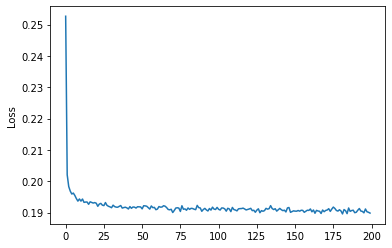

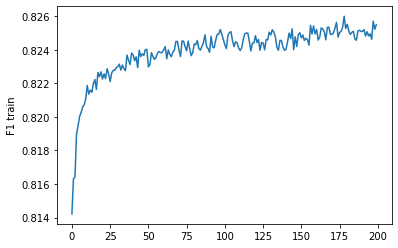

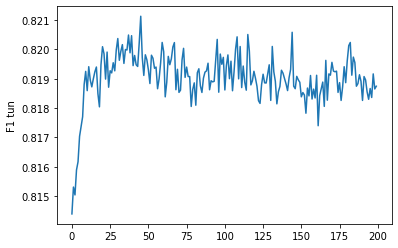

best F1 tuning =  0.8211311589174185
best F1 training =  0.8236055824660687


In [ ]:
import matplotlib.pyplot as plt

plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

plt.plot(f1_train)
plt.ylabel('F1 train')
plt.show()

plt.plot(f1_tun)
plt.ylabel('F1 tun')
plt.show()

print("best F1 tuning = ", best_max_F1_tun)
print("best F1 training = ", best_max_F1_train)

In [ ]:
def to_labelsNN(pos_probs, threshold):
	return (pos_probs >= threshold).long()

In [ ]:
print("best threshold = ", best_th)

# load...
file = open('best_network.pkl', 'rb')
network = pickle.load(file)
y_pred = to_labelsNN(network.forward(X_testNN), best_th)

print("accuracy score =", accuracy_score(y_testNN, y_pred))
print("confusion matrix\n", confusion_matrix(y_testNN, y_pred))
print("precision score =", precision_score(y_testNN, y_pred))
print("recall score =", recall_score(y_testNN, y_pred))
print("f1 score =", f1_score(y_testNN, y_pred))

file.close()

best threshold =  0.47812733
accuracy score = 0.7117874558600975
confusion matrix
 [[ 329 1535]
 [ 179 3904]]
precision score = 0.7177790034932892
recall score = 0.9561596865050208
f1 score = 0.8199957992018483


In [ ]:
models.append("Neural Network")
acc.append(accuracy_score(y_testNN, y_pred))
f1.append(f1_score(y_testNN, y_pred))

##### Comparision

In [ ]:
comparison1 = pd.DataFrame({'Model': models, 'Accuracy': acc, 'F1 Score': f1})
comparison1

,Model,Accuracy,F1 Score
0,Logistic Regression,0.686733,0.814202
1,SVM,0.686397,0.814039
2,Decision Tree,0.686565,0.814158
3,Random Forest,0.719018,0.821455
4,XGBoost,0.715655,0.821831
5,K Nearest Neighbour,0.687405,0.814378
6,Gaussian Naives Bayes,0.687405,0.814267
7,Neural Network,0.711787,0.819996


#### 6.2. **Predicting on Multiple Classes** 

For multiple classification, we use 70% for training, 15% for tuning, and 15% for tetsing (changing threshold).

In [ ]:
X = news.drop([" shares", "url", " timedelta", "publication_time", "data_channel_is_others", "data_channel", "binary", "multiple"], axis = 1)
y = news["multiple"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from statistics import mean
models = []
acc = []
f1 = []

##### SVM

In [ ]:
svm = SVC(kernel='poly', gamma='scale', C=0.1).fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
print("accuracy score =", accuracy_score(y_test, y_pred))
print("f1 score =", f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

accuracy score = 0.28056162771145116
f1 score = [0.         0.01128668 0.42948981 0.10364465]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2996
           2       0.24      0.01      0.01      2595
           3       0.28      0.96      0.43      3285
           4       0.37      0.06      0.10      3018

    accuracy                           0.28     11894
   macro avg       0.22      0.26      0.14     11894
weighted avg       0.22      0.28      0.15     11894



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
models.append("SVM")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average='weighted'))

##### Decision Tree

In [ ]:
dtree_model = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 15).fit(X_train, y_train)
y_pred = dtree_model.predict(X_test)

In [ ]:
print("accuracy score =", accuracy_score(y_test, y_pred))
print("f1 score =", f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

accuracy score = 0.32991424247519757
f1 score = [0.40089873 0.25839985 0.30029841 0.35257625]
              precision    recall  f1-score   support

           1       0.39      0.42      0.40      2996
           2       0.25      0.27      0.26      2595
           3       0.31      0.29      0.30      3285
           4       0.37      0.34      0.35      3018

    accuracy                           0.33     11894
   macro avg       0.33      0.33      0.33     11894
weighted avg       0.33      0.33      0.33     11894



In [ ]:
models.append("Decision Tree")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average='weighted'))

##### Random Forest

In [ ]:
rfc = RandomForestClassifier(class_weight = 'balanced', max_depth = 15).fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
print("accuracy score =", accuracy_score(y_test, y_pred))
print("f1 score =", f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

accuracy score = 0.3942323860770136
f1 score = [0.48646275 0.19480519 0.34926471 0.4597841 ]
              precision    recall  f1-score   support

           1       0.43      0.55      0.49      2996
           2       0.30      0.14      0.19      2595
           3       0.35      0.35      0.35      3285
           4       0.42      0.50      0.46      3018

    accuracy                           0.39     11894
   macro avg       0.38      0.39      0.37     11894
weighted avg       0.38      0.39      0.38     11894



In [ ]:
models.append("Random Forest")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average='weighted'))

##### XGBoost

In [ ]:
XGBoost = xgb.XGBClassifier(max_depth=15, objective= 'multi:softprob').fit(X_train, y_train)
y_pred = XGBoost.predict(X_test)

In [ ]:
print("accuracy score =", accuracy_score(y_test, y_pred))
print("f1 score =", f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

accuracy score = 0.38935597780393477
f1 score = [0.47626225 0.21057786 0.38391877 0.42276423]
              precision    recall  f1-score   support

           1       0.43      0.53      0.48      2996
           2       0.29      0.17      0.21      2595
           3       0.35      0.43      0.38      3285
           4       0.44      0.40      0.42      3018

    accuracy                           0.39     11894
   macro avg       0.38      0.38      0.37     11894
weighted avg       0.38      0.39      0.38     11894



In [ ]:
models.append("XGBoost")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average='weighted'))

##### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("accuracy score =", accuracy_score(y_test, y_pred))
print("f1 score =", f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

accuracy score = 0.29628384059189505
f1 score = [0.3629169  0.21463816 0.29327217 0.28598342]
              precision    recall  f1-score   support

           1       0.31      0.43      0.36      2996
           2       0.23      0.20      0.21      2595
           3       0.29      0.29      0.29      3285
           4       0.33      0.25      0.29      3018

    accuracy                           0.30     11894
   macro avg       0.29      0.29      0.29     11894
weighted avg       0.29      0.30      0.29     11894



In [ ]:
models.append("KNN")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average='weighted'))

##### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [ ]:
print("accuracy score =", accuracy_score(y_test, y_pred))
print("f1 score =", mean(f1_score(y_test, y_pred, average=None)))
print(classification_report(y_test, y_pred))

accuracy score = 0.27787119556078693
f1 score = 0.2010060988538133
              precision    recall  f1-score   support

           1       0.27      0.81      0.40      2996
           2       0.19      0.04      0.07      2595
           3       0.32      0.18      0.23      3285
           4       0.47      0.06      0.11      3018

    accuracy                           0.28     11894
   macro avg       0.31      0.27      0.20     11894
weighted avg       0.32      0.28      0.21     11894



In [ ]:
models.append("Gaussian Naive Bayes")
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average='weighted'))

##### Comparision

In [ ]:
comparison2 = pd.DataFrame({'Model': models, 'Accuracy': acc, 'F1 Score Weighted': f1})
comparison2

,Model,Accuracy,F1 Score Weighted
0,SVM,0.280562,0.147382
1,Decision Tree,0.329914,0.329763
2,Random Forest,0.394232,0.378168
3,XGBoost,0.389356,0.379217
4,KNN,0.296284,0.291809
5,Gaussian Naive Bayes,0.277871,0.206057


#### 6.3. **Conclusion**

We create models based on eight distinct supervised classification techniques for binary classes and six for multiple classes to predict the popularity of a news story based on the various factors:
* SVM
* Decision Tree
* Random Forest
* XGBoost
* K Nearest Neighbor
* Gaussian Naive Bayes
* Logistic Regression (for binary only)
* Neural Network (for binary only)

We also use the threshold tuning technique for binary classification models to get the best possible score for our model. As a result, the XGBoost outperformed other models in binary and multiple classifications in terms of accuracy and F1 scores, as shown by the findings.

The XGBoost model we created has an 82.18% F1 score and 71.57% accuracy rate when applied to the testing data for binary classification. However, the scores for the multiple classifications are relatively small when using these models, with the highest of 37.92% and the lowest of 14.74% for the F1 score.